In [2]:
import matplotlib.pyplot as plt
import numpy as np
from faker import Faker

In [3]:
fake = Faker()

---

# Horizontal

## Multiple

### Data

#### labels

In [8]:
size = 3

names = [fake.first_name() for _ in range(size)]

print(names)

['Andrew', 'Christopher', 'Justin']


#### Data

In [11]:
properties = {
    'age': [fake.random_int(max=100) for _ in range(size)],
    'weight': [fake.random_int(min=70, max=300) for _ in range(size)],
}

print(properties)

{'age': [53, 16, 35], 'weight': [126, 74, 218]}


### Chart with different scale axis

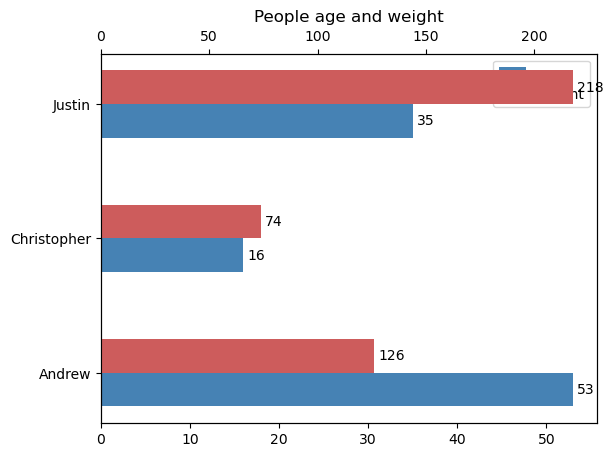

In [12]:
_, yAxis = plt.subplots()
columns = [*zip(properties.keys(),
                properties.values(),
                [yAxis, yAxis.twiny()],
                ['steelblue', 'indianred'])]
y_pos = np.arange(len(names))
width = 0.25
multiplier = 0
lines, labels = [], []

for label, measurement, axis, color in columns:
    bars = axis.barh(y_pos + width * multiplier, measurement, width, label=label, color=color)
    axis.bar_label(bars, padding=3)
    multiplier += 1
    _handles, _labels = axis.get_legend_handles_labels()
    lines.append(next(iter(_handles)))
    labels.append(next(iter(_labels)))

yAxis.set_title('People age and weight')
yAxis.set_yticks(y_pos + width / 2, names)

yAxis.legend(lines, labels, loc=0)

plt.show()

### Chart with multiple axis with same scale

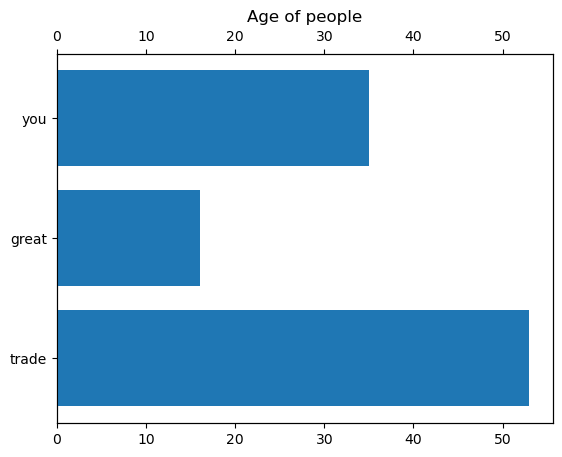

In [23]:
_, yAxis = plt.subplots()
y_pos = np.arange(len(names))

yAxis.barh(y_pos, properties['age'])
yAxis.set_yticks(y_pos, labels=names)
yAxisTwin = yAxis.twiny()
yAxisTwin.barh(y_pos, properties['age'])
yAxisTwin.set_yticks(y_pos, labels=[fake.word() for _ in names])
yAxisTwin.yaxis.tick_right()

yAxis.set_title('Age of people')
plt.show()